In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import time

array([[1.5593274e+09],
       [1.5594138e+09],
       [1.5595002e+09],
       [1.5595866e+09],
       [1.5596730e+09],
       [1.5597594e+09],
       [1.5624378e+09],
       [1.5625242e+09],
       [1.5626106e+09],
       [1.5626970e+09],
       [1.5627834e+09],
       [1.5628698e+09],
       [1.5629562e+09],
       [1.5630426e+09],
       [1.5631290e+09],
       [1.5632154e+09],
       [1.5633018e+09],
       [1.5633882e+09],
       [1.5661530e+09],
       [1.5662394e+09],
       [1.5663258e+09]])

[0.8100036000040012,
 0.09000180000900228,
 0.5625,
 0.09000180000900228,
 0.0,
 0.9024943000089928,
 0.0625,
 0.3599976000039992,
 0.5625,
 0.6400048000090061,
 0.20249730000899657,
 0.09000180000900228,
 0.25,
 0.12249860000399955,
 0.9024943000089928,
 0.0625,
 0.8100036000040012,
 0.039998800008998484,
 0.12250420003600532,
 0.5625,
 0.09000180000900228]

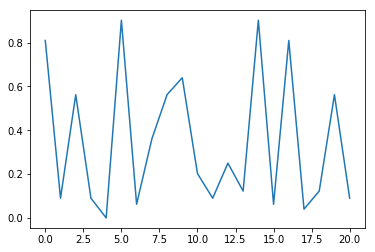

In [91]:
def date_parser(x):
    dt = time.strptime(x,"%Y-%m-%d")
    return time.mktime(dt)

df=pd.read_csv("MANAPPURAM.BO.csv")

df["timestamp"]=df["Date"].apply(date_parser)
# df.to_csv("asdfsdf.csv",index=False)
# df["Date"]= pd.to_datetime(df["Date"]) 
# pd.tslib.Timestamp(df["Date"])
# df.info()
# df.Date.tolist()
# dt = time.strptime("")
# time.mktime()

# plt.scatter(df.timestamp,df.Close)
# plt.plot(df.timestamp,df.Close)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import numpy as np

lr_model=LinearRegression()
rf_model=RandomForestClassifier(n_estimators=50)
timestamp = df[['timestamp']]


# def date_parser(x):
#     dt = time.strptime(x,"%Y-%m-%d")
#     return time.mktime(dt)# lr_model.fit(timestamp,df.Close)

fitted_model=rf_model.fit(timestamp,df.Close.astype(int))
predicted_array=fitted_model.predict(timestamp)
# print(list(map(lambda x: date_parser(x),["2019-06-10","2019-06-30","2019-07-10"])))
twoD_modified=np.array(list(map(lambda x: date_parser(x),["2019-06-01","2019-06-02","2019-06-03","2019-06-04","2019-06-05","2019-06-06","2019-07-07","2019-07-08","2019-07-09","2019-07-10","2019-07-11","2019-07-12","2019-07-13","2019-07-14","2019-07-15","2019-07-16","2019-07-17","2019-07-18","2019-08-19","2019-08-20","2019-08-21"]))).reshape(21 ,1)
twoD_modified
predicted_future_array=rf_model.predict(twoD_modified)
error=[val**2 for val in (df.Close-predicted_array)]
error
plt.plot(error)

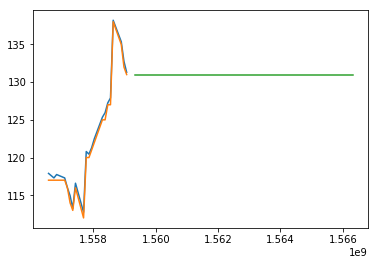

In [98]:
plt.plot(df.timestamp,df.Close)
plt.plot(df.timestamp,predicted_array)
plt.plot(list(map(lambda x: date_parser(x),["2019-06-01","2019-06-02","2019-06-03","2019-06-04","2019-06-05","2019-06-06","2019-07-07","2019-07-08","2019-07-09","2019-07-10","2019-07-11","2019-07-12","2019-07-13","2019-07-14","2019-07-15","2019-07-16","2019-07-17","2019-07-18","2019-08-19","2019-08-20","2019-08-21"])),predicted_future_array)

In [28]:
import pandas as pd
# create dataframe
number = [1,2,3,4,5]
sex = ['male','female','female','female','male']
df_new = pd.DataFrame()
df_new['number'] = number
df_new['sex'] = sex
df_new.head()
# create def for category to number 0/1
def tran_cat_to_num(df):
    if df['sex'] == 'male':
        return 1
    elif df['sex'] == 'female':
        return 0
# create sex_new 
df_new['sex_new']=df_new.apply(tran_cat_to_num,axis=1)
df_new

,number,sex
0,1,male
1,2,female
2,3,female
3,4,female
4,5,male


,number,sex,sex_new
0,1,male,1
1,2,female,0
2,3,female,0
3,4,female,0
4,5,male,1
